In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
from scipy import linalg
import numpy as np

import pandas as pd
import pickle 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

In [3]:
# load in X_train, X_test, Y_train, Y_test
from pathlib import Path

data_dir = Path("./data/photometry")
print(f"{data_dir.exists() = }")


with open(data_dir / "x_test.pkl", 'rb') as f:
    x_test = pickle.load(f)
with open(data_dir / "x_train.pkl", 'rb') as f:
    x_train = pickle.load(f)
with open(data_dir  / "x_val.pkl", 'rb') as f:
    x_val = pickle.load(f)
    
with open(data_dir / "y_test.pkl", 'rb') as f:
    y_test = pickle.load(f)
with open(data_dir / "y_train.pkl", 'rb') as f:
    y_train = pickle.load(f)
with open(data_dir / "y_val.pkl", 'rb') as f:
    y_val = pickle.load(f)

data_dir.exists() = True


In [5]:
n_clusters = 3
random_state = 69

km = KMeans(n_clusters=n_clusters, random_state=random_state)
km.fit(x_train[:,:5])

y_val_clustered = km.predict(x_val[:,:5])
accuracy_score(y_val, y_val_clustered)



C:\Users\hbar6\projects\MIDS\207\Stellar-Classification\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3570178508925446

In [10]:
# need to map the kmeans clusters to the corresponding classification
y_train_clustered = model.predict(x_train[:,:5])

for i in range(10):
    print(f"y_train = {y_train[i]}\ty_train_clustered = {y_train_clustered[i]}")


y_train = 0	y_train_clustered = 2
y_train = 0	y_train_clustered = 1
y_train = 0	y_train_clustered = 1
y_train = 0	y_train_clustered = 0
y_train = 2	y_train_clustered = 1
y_train = 2	y_train_clustered = 1
y_train = 1	y_train_clustered = 1
y_train = 0	y_train_clustered = 1
y_train = 1	y_train_clustered = 1
y_train = 0	y_train_clustered = 2


In [69]:
# gaussian mixture model now
n_components = 3
random_state = 69
gm = GaussianMixture(n_components = n_components, random_state=random_state)
gm.fit(x_train)
y_val_clustered = gm.predict(x_val)
accuracy_score(y_val, y_val_clustered)


0.1785089254462723

In [70]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


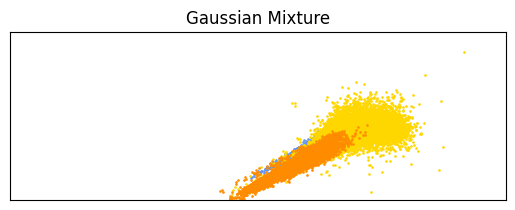

In [71]:
plot_results(x_val, y_val_clustered, gm.means_, gm.covariances_, 0, "Gaussian Mixture")

In [72]:
# rotate y_val to see if they match y_val_clustered

y_val_map = {
    0 : 0,
    1 : 1,
    2 : 2
}

y_val_mapped = np.array([y_val_map[yv] for yv in y_val])
print(accuracy_score(y_val_mapped, y_val_clustered))

y_val_map = {
    0 : 0,
    1 : 2,
    2 : 1
}

y_val_mapped = np.array([y_val_map[yv] for yv in y_val])
print(accuracy_score(y_val_mapped, y_val_clustered))




y_val_map = {
    0 : 1,
    1 : 2,
    2 : 0
}

y_val_mapped = np.array([y_val_map[yv] for yv in y_val])
print(accuracy_score(y_val_mapped, y_val_clustered))


y_val_map = {
    0 : 0,
    1 : 2,
    2 : 1
}

y_val_mapped = np.array([y_val_map[yv] for yv in y_val])
print(accuracy_score(y_val_mapped, y_val_clustered))






y_val_map = {
    0 : 2,
    1 : 0,
    2 : 1
}

y_val_mapped = np.array([y_val_map[yv] for yv in y_val])
print(accuracy_score(y_val_mapped, y_val_clustered))

y_val_map = {
    0 : 0,
    1 : 2,
    2 : 1
}

y_val_mapped = np.array([y_val_map[yv] for yv in y_val])
print(accuracy_score(y_val_mapped, y_val_clustered))




0.1785089254462723
0.09095454772738637
0.41317065853292667
0.09095454772738637
0.40832041602080105
0.09095454772738637


0.21456072803640183

In [76]:
np.log(-1)

C:\Users\hbar6\AppData\Local\Temp\ipykernel_50884\153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan